In [1]:
#reading the dataset
import pandas as pd
data=pd.read_csv("Week_8_Q&A_dataset - Sheet1.csv")

In [2]:
data.head()

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21


In [3]:
#checking null values
data.isnull().sum()

Gender              0
Test preparation    0
Total Marks         0
dtype: int64

# 1. Carry out descriptive analytics on the dataset.

In [4]:
data.groupby("Gender").describe()

Total Marks                                                      
             count       mean        std   min    25%   50%    75%   max
Gender                                                                  
female        16.0  33.750000  12.865976  12.0  25.50  39.0  43.50  50.0
male          12.0  30.416667  12.168950  14.0  21.75  29.0  43.25  47.0

In [5]:
#The females on average, scored more mark than the males in this particular test
data.loc[data["Total Marks"]==data["Total Marks"].max()] # to show the status of the person with highest mark

,Gender,Test preparation,Total Marks
26,female,completed,50


In [6]:
data.loc[data["Total Marks"]==data["Total Marks"].min()]  # to show the details of the person with lowest mark

,Gender,Test preparation,Total Marks
7,female,none,12


In [7]:
data['Gender'].value_counts()

female    16
male      12
Name: Gender, dtype: int64

In [8]:
import matplotlib.pyplot as plt
data['Gender'].value_counts().plot(kind='bar',color=['blue','red'])
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Count of students", labelpad=14)
plt.title(" male vs female students", y=1.02)

Text(0.5, 1.02, ' male vs female students')

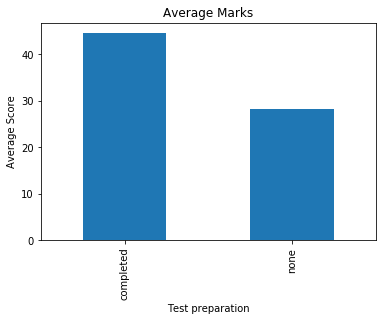

In [9]:
graph=data.groupby("Test preparation")["Total Marks"].mean()
graph.plot(kind='bar')

plt.title('Average Marks')
plt.ylabel('Average Score') 
plt.show()

In [10]:
data.groupby(['Gender','Test preparation']).mean()

Total Marks
Gender Test preparation             
female completed           45.250000
       none                29.916667
male   completed           43.666667
       none                26.000000

# 2.To check whether female and male students scored the same marks

H0: Marks of both male & female students are same

H1:Marks of both the students differ

In [11]:
from scipy import stats
female=data[data['Gender']=='female']['Total Marks']
male=data[data['Gender']=='male']['Total Marks']
ttest,pval = stats.ttest_ind(female,male)
print("p-value",pval)
if pval <0.05:
  print("We reject null hypothesis i.e.Marks of both male & female students are same")
else:
  print("We accept null hypothesis i.e.Marks of both male & female students are same ")

p-value 0.4937822317960763
We accept null hypothesis i.e.Marks of both male & female students are same 


# 3.To check whether test preparation helps the students

H0: Test preparation has no effect on students performance

H1: Test preparation effected in increasing student's Marks

In [41]:
none=data[data['Test preparation']=='none']['Total Marks']
completed=data[data['Test preparation']=='completed']['Total Marks']
ttest,p_value=stats.ttest_ind(none,completed)
print('p-value',p_value)
if p_value <0.05:
  print("We reject null hypothesis i.e.  Test preparation effected in increasing student's Marks")
else:
  print("We accept null hypothesis i.e.Test preparation has no effect on students performance")

p-value 0.0012671292457320106
We reject null hypothesis i.e.  Test preparation effected in increasing student's Marks
